In [1]:
import pandas as pd
import numpy as np
import time as t
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
dataframe_project = pd.read_csv(r'D:\College Education\Semester 5\19CSE305 Machine Learning\Project\Coding\patches_gabor_15816_1.csv')
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,good
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,good
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,good
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,good
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,bad
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,bad
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,bad
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,bad


In [3]:
from sklearn import preprocessing as prep
label_encoder = prep.LabelEncoder()
dataframe_project['class'] = label_encoder.fit_transform(dataframe_project['class'])
dataframe_project

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,1607984,590161,30393367,30586929,30908212,3557712,1621138,652953,29941573,...,42706367,21992566,62263734,65066148,249147,40622791,42675142,21954827,62367472,1
1,MaI286_256.jpg_0_0.png,2409410,643821,28341070,27499264,28892467,3982411,2402321,644235,27960356,...,45782802,23562865,61063851,64309685,252989,43541072,45761590,23541111,61161404,1
2,MaI286_256.jpg_0_2.png,1244326,369812,30907068,27466105,28429032,2831793,1252555,602900,30921587,...,45316007,23315932,63392361,65690131,257766,43109193,45296517,23293852,63474181,1
3,MaI286_256.jpg_0_3.png,1631795,557097,30301489,29490085,29306020,4807170,1644043,1057676,29838689,...,41933519,21616534,60989696,65434755,472186,40035467,41888839,21567725,61148415,1
4,MaI286_258.jpg_0_0.png,984212,433434,29948438,30600901,31128474,2724761,979870,374437,30769862,...,43313769,22282942,63965827,66146550,137173,41167720,43298158,22265049,64010694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,1148726,301551,24516974,27216360,30997331,8563063,1133933,291160,24664964,...,36116804,18562491,61832379,65723007,65218,34301160,36116430,18561987,61803126,0
4306,MaI843_048_0_1.png,645854,234329,29333027,29946293,31494284,6389616,634937,464582,29331611,...,40270695,20714888,62239700,66517727,119120,38264591,40266947,20706356,62337197,0
4307,MaI843_048_0_0.png,3120475,666772,29133067,29819972,30353781,5961931,3086075,357274,29495865,...,38812330,19959629,59041573,62365063,74478,36842285,38809960,19953819,59094463,0
4308,MaI843_047_0_8.png,1277520,612085,24686619,27101002,30589675,10843015,1271576,646650,25356419,...,35144094,18084309,60155871,66228896,176590,33418317,35146446,18088530,60149050,0


In [4]:
normal_scaler = prep.StandardScaler()
scaled_columns = dataframe_project.columns[1:25]
scaled_df = dataframe_project
for col in scaled_columns:
    scaled_df[col] = normal_scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))
scaled_df

,ImageName,LocalEnergy_0_1,LocalEnergy_0_2,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_1,LocalEnergy_0.7853981633974483_2,LocalEnergy_0.7853981633974483_3,LocalEnergy_1.5707963267948966_1,LocalEnergy_1.5707963267948966_2,LocalEnergy_1.5707963267948966_3,...,MeanAmplitude_0.7853981633974483_1,MeanAmplitude_0.7853981633974483_2,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_1.5707963267948966_1,MeanAmplitude_1.5707963267948966_2,MeanAmplitude_1.5707963267948966_3,MeanAmplitude_2.356194490192345_1,MeanAmplitude_2.356194490192345_2,MeanAmplitude_2.356194490192345_3,class
0,MaI286_255.jpg_0_0.png,0.206364,1.137685,1.050212,0.961044,0.666561,-0.787215,0.215413,1.248537,0.990115,...,1.077631,1.082246,0.726466,0.556098,1.807526,1.081326,1.075729,1.077680,0.730857,1
1,MaI286_256.jpg_0_0.png,0.817664,1.323767,0.853097,0.674644,0.497735,-0.743263,0.810270,1.219416,0.800269,...,1.286252,1.289359,0.676086,0.527098,1.847232,1.289622,1.285047,1.286934,0.680215,1
2,MaI286_256.jpg_0_2.png,-0.071022,0.373560,1.099551,0.671568,0.458921,-0.862340,-0.065256,1.081344,1.084022,...,1.254597,1.256790,0.773855,0.580019,1.896600,1.258796,1.253507,1.254317,0.777327,1
3,MaI286_256.jpg_0_3.png,0.224526,1.023026,1.041387,0.859305,0.532372,-0.657909,0.232855,2.600439,0.980256,...,1.025223,1.032650,0.672973,0.570229,4.112539,1.039405,1.022403,1.026616,0.679669,1
4,MaI286_258.jpg_0_0.png,-0.269428,0.594188,1.007478,0.962340,0.685009,-0.873417,-0.272901,0.318206,1.069484,...,1.118821,1.120545,0.797933,0.597516,0.650323,1.120221,1.117981,1.118603,0.799854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.136845,0.485807,0.648403,0.674025,-0.269214,-0.155585,0.040035,0.484496,...,0.630777,0.629839,0.708355,0.581279,-0.093301,0.630111,0.630928,0.630116,0.707160,0
4306,MaI843_048_0_1.png,-0.527516,-0.096267,0.948370,0.901621,0.715647,-0.494143,-0.535561,0.619319,0.931666,...,0.912462,0.913728,0.725457,0.611745,0.463753,0.913006,0.912409,0.912989,0.729585,0
4307,MaI843_048_0_0.png,1.360040,1.403357,0.929165,0.889904,0.620126,-0.538403,1.330936,0.260876,0.947406,...,0.813567,0.814113,0.591175,0.452550,0.002397,0.811487,0.813599,0.813718,0.593426,0
4308,MaI843_047_0_8.png,-0.045703,1.213713,0.502100,0.637703,0.639883,-0.033262,-0.050772,1.227483,0.550753,...,0.564815,0.566770,0.637962,0.600673,1.057681,0.567096,0.565145,0.567660,0.637707,0


In [5]:
dataframe_scaled_input = scaled_df.iloc[:, 1:25]
dataframe_scaled_output = scaled_df.iloc[:, 25]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())

In [7]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colName=corr_matrix.columns[i]
                col_corr.add(colName)
    return col_corr
col=correlation(input_train_res,0.8)
print('Correlated columns:',col)
print(len(col))

Correlated columns: {'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_0_1', 'LocalEnergy_0.7853981633974483_1', 'LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_2.356194490192345_1', 'MeanAmplitude_0.7853981633974483_2', 'MeanAmplitude_0.7853981633974483_1', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_0.7853981633974483_3', 'MeanAmplitude_1.5707963267948966_3', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_0_2', 'MeanAmplitude_1.5707963267948966_2', 'MeanAmplitude_0_3', 'MeanAmplitude_2.356194490192345_2', 'LocalEnergy_2.356194490192345_3', 'LocalEnergy_0.7853981633974483_2'}
19


In [8]:
dataframe_reduced = dataframe_project.drop(columns = ['LocalEnergy_1.5707963267948966_3', 'MeanAmplitude_1.5707963267948966_1', 'MeanAmplitude_1.5707963267948966_2', 'LocalEnergy_1.5707963267948966_2', 'LocalEnergy_0.7853981633974483_2', 'MeanAmplitude_0.7853981633974483_1', 'LocalEnergy_2.356194490192345_3', 'MeanAmplitude_0.7853981633974483_2', 'LocalEnergy_2.356194490192345_1', 'MeanAmplitude_1.5707963267948966_3', 'LocalEnergy_0.7853981633974483_1', 'MeanAmplitude_0_3', 'LocalEnergy_1.5707963267948966_1', 'MeanAmplitude_0_1', 'MeanAmplitude_2.356194490192345_2', 'LocalEnergy_0_2', 'MeanAmplitude_2.356194490192345_3', 'LocalEnergy_2.356194490192345_2', 'MeanAmplitude_0_2'])
dataframe_reduced

,ImageName,LocalEnergy_0_1,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_2.356194490192345_1,class
0,MaI286_255.jpg_0_0.png,0.206364,1.050212,-0.787215,0.726466,1.075729,1
1,MaI286_256.jpg_0_0.png,0.817664,0.853097,-0.743263,0.676086,1.285047,1
2,MaI286_256.jpg_0_2.png,-0.071022,1.099551,-0.862340,0.773855,1.253507,1
3,MaI286_256.jpg_0_3.png,0.224526,1.041387,-0.657909,0.672973,1.022403,1
4,MaI286_258.jpg_0_0.png,-0.269428,1.007478,-0.873417,0.797933,1.117981,1
...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.485807,-0.269214,0.708355,0.630928,0
4306,MaI843_048_0_1.png,-0.527516,0.948370,-0.494143,0.725457,0.912409,0
4307,MaI843_048_0_0.png,1.360040,0.929165,-0.538403,0.591175,0.813599,0
4308,MaI843_047_0_8.png,-0.045703,0.502100,-0.033262,0.637962,0.565145,0


In [9]:
dataframe_scaled_input = dataframe_reduced.iloc[:, 1:6]
dataframe_scaled_output = dataframe_reduced.iloc[:, 6]
scaled_input_train, scaled_input_test, scaled_output_train, scaled_output_test = train_test_split(dataframe_scaled_input, dataframe_scaled_output, test_size=0.3, random_state=42)

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(scaled_input_train, scaled_output_train.ravel())
print(output_train_res)

[0 1 0 ... 2 2 2]


In [11]:
dataframe_final = dataframe_reduced
dataframe_final

,ImageName,LocalEnergy_0_1,LocalEnergy_0_3,LocalEnergy_0.7853981633974483_3,MeanAmplitude_0.7853981633974483_3,MeanAmplitude_2.356194490192345_1,class
0,MaI286_255.jpg_0_0.png,0.206364,1.050212,-0.787215,0.726466,1.075729,1
1,MaI286_256.jpg_0_0.png,0.817664,0.853097,-0.743263,0.676086,1.285047,1
2,MaI286_256.jpg_0_2.png,-0.071022,1.099551,-0.862340,0.773855,1.253507,1
3,MaI286_256.jpg_0_3.png,0.224526,1.041387,-0.657909,0.672973,1.022403,1
4,MaI286_258.jpg_0_0.png,-0.269428,1.007478,-0.873417,0.797933,1.117981,1
...,...,...,...,...,...,...,...
4305,MaI843_047_0_0.png,-0.143943,0.485807,-0.269214,0.708355,0.630928,0
4306,MaI843_048_0_1.png,-0.527516,0.948370,-0.494143,0.725457,0.912409,0
4307,MaI843_048_0_0.png,1.360040,0.929165,-0.538403,0.591175,0.813599,0
4308,MaI843_047_0_8.png,-0.045703,0.502100,-0.033262,0.637962,0.565145,0


In [12]:
input_final = dataframe_final.iloc[:, 1:6]
output_final = dataframe_final.iloc[:, 6]
final_input_train, final_input_test, final_output_train, final_output_test = train_test_split(input_final, output_final, test_size=0.3, random_state=42)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
input_train_res, output_train_res = sm.fit_resample(final_input_train, final_output_train.ravel())

[0 1 0 ... 2 2 2]


In [14]:
# Project data classification rules
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)

scores_knn = cross_val_score(knn_model, input_final.values, output_final.values, cv = 10)
start_train_knn = t.time()
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_knn.fit(input_train_res, output_train_res)
end_train_knn = t.time()
training_time_knn = end_train_knn - start_train_knn
predicted_knn_train = grid_search_knn.predict(input_train_res.values)

start_test_knn = t.time()
predicted_knn_test = grid_search_knn.predict(final_input_test.values)
end_test_knn = t.time()
testing_time_knn = end_test_knn - start_test_knn

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
print("Training data")
print(classification_report(output_train_res, predicted_knn_train))
print("Accuracy: ", accuracy_score(output_train_res, predicted_knn_train))
print("Precision: ", precision_score(output_train_res, predicted_knn_train, average='weighted'))
print("Recall: ", recall_score(output_train_res, predicted_knn_train, average='weighted'))
print("F1-score: ", f1_score(output_train_res, predicted_knn_train, average='weighted'))
print(training_time_knn, 's')
print("Testing data")
print(classification_report(final_output_test, predicted_knn_test))
print("Accuracy: ", accuracy_score(final_output_test, predicted_knn_test))
print("Precision: ", precision_score(final_output_test, predicted_knn_test, average='weighted'))
print("Recall: ", recall_score(final_output_test, predicted_knn_test, average='weighted'))
print("F1-score: ", f1_score(final_output_test, predicted_knn_test, average='weighted'))
print(testing_time_knn, 's')
print(grid_search_knn.best_params_)
print("Mean Accuracy: ",scores_knn.mean())
print("Standard Deviation: ",scores_knn.std())

Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442
           1       1.00      1.00      1.00      1442
           2       1.00      1.00      1.00      1442

    accuracy                           1.00      4326
   macro avg       1.00      1.00      1.00      4326
weighted avg       1.00      1.00      1.00      4326

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
4.751504898071289 s
Testing data
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       449
           1       0.74      0.70      0.72       621
           2       0.36      0.48      0.41       223

    accuracy                           0.65      1293
   macro avg       0.61      0.62      0.61      1293
weighted avg       0.67      0.65      0.66      1293

Accuracy:  0.6511987625676721
Precision:  0.6715663200296668
Recall:  0.6511987625676721
F1-score:  0.6593080465802315
0.05420899391

In [16]:
sm = SMOTE(random_state=2)
input_total_res, output_total_res = sm.fit_resample(input_final, output_final.ravel())

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

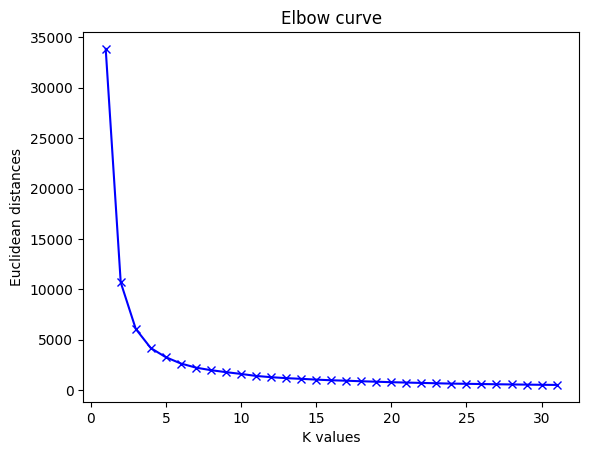

In [17]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
model_k_means = KMeans()
k_values = range(1, 32)
euclidean_distances = []
for k in k_values:
    k_means_model = KMeans(n_clusters=k)
    k_means_model.fit(input_total_res)
    euclidean_distances.append(k_means_model.inertia_)
plt.plot(k_values, euclidean_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Euclidean distances')
plt.title('Elbow curve')
plt.show()

In [18]:
start_train_k_means = t.time()
grid_search_k_means = GridSearchCV(model_k_means, param_grid= {'n_clusters': [2, 3, 4, 5, 6]})
grid_search_k_means.fit(input_total_res)
end_train_k_means = t.time()
training_time_k_means = end_train_k_means - start_train_k_means
predicted_k_means_train = grid_search_k_means.predict(input_total_res)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
print("Training data")
print(output_total_res.shape)
print(predicted_k_means_train.shape)
print('Silhouette score: ', silhouette_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('DB index: ', davies_bouldin_score(output_total_res.reshape(-1, 1), predicted_k_means_train.reshape(-1 , 1)))
print('ARI score: ', adjusted_rand_score(output_total_res, predicted_k_means_train))
print('Computational time: ', training_time_k_means, 's')
print(grid_search_k_means.best_params_)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training data
(6189,)
(6189,)
Silhouette score:  -0.12235271046484862
DB index:  25.516352519429578
ARI score:  0.1060214459107948
Computational time:  1.5505247116088867 s
{'n_clusters': 6}


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import make_scorer
model_agglomerative = AgglomerativeClustering()
start_train_time = t.time()
grid_search_model_agglomerative = GridSearchCV(model_agglomerative, cv=5, param_grid={'n_clusters': [2, 3, 4, 5, 6], 'metric': ['euclidean', 'manhattan', 'cosine', 'l2', 'l1'], 'linkage': ['ward', 'complete', 'average', 'single']})
grid_search_model_agglomerative.fit(input_total_res)
end_train_time = t.time()
training_time_agglomerative = end_train_time - start_train_time
predicted_agglo_train = grid_search_model_agglomerative.predict(input_total_res)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator AgglomerativeClustering() does not.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
print('Silhouette score: ', silhouette_score(output_total_res.reshape(-1, 1), predicted_agglo_train.reshape(-1 , 1)))
print('DB index: ', davies_bouldin_score(output_total_res.reshape(-1, 1), predicted_agglo_train.reshape(-1 , 1)))
print('ARI score: ', adjusted_rand_score(output_total_res, predicted_agglo_train))
print('Computational time: ', training_time_agglomerative 's')
print(grid_search_k_means.best_params_)